

# Sección 1: Esta sección proporciona una introducción al proyecto, incluyendo el objetivo y la descripción de los datos.




**Contexto del Proyecto**

En el mundo de las finanzas, la predicción precisa del precio de las acciones es un desafío codiciado por inversores y analistas. Con el auge de la tecnología y el aprendizaje automático (ML), ahora es posible aprovechar el poder de los algoritmos para analizar grandes conjuntos de datos y generar predicciones informadas sobre el comportamiento del mercado.

**Objetivo**

Tu misión es explorar los factores que influyen en el precio de las acciones de Tesla (TSLA) utilizando un conjunto de datos histórico. Aplicarás técnicas de Data Science aprendidas en el curso para obtener insights y realizar predicciones.

Pasos del Proyecto

1-

Exploración y Limpieza de Datos

Carga del Dataset:

In [123]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


In [124]:
uploaded = files.upload()
df = pd.read_csv('TSLA.csv')

Saving TSLA.csv to TSLA (8).csv


Compresion del **Dataset**

In [125]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB
None
              Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   

Número de filas: El dataset contiene 2416 registros.

Número de columnas: Hay 7 columnas en total: Date, Open, High, Low, Close, Adj Close, Volume.

Date es un objeto

Las columnas Open, High, Low, Close, Adj Close son de tipo float64.

Volume es de tipo int64.

Valores no nulos:

Todas las columnas tienen 2416 valores no nulos, lo que significa que no hay valores faltantes en este conjunto de datos

Open: Precio de apertura de las acciones.

Media: 186.27

Desviación estándar: 118.74

Rango: 16.14 a 673.69

High: Precio más alto de las acciones durante el día.

Media: 189.58

Desviación estándar: 120.89

Rango: 16.63 a 786.14

Low: Precio más bajo de las acciones durante el día.

Media: 182.92

Desviación estándar: 116.86

Rango: 14.98 a 673.52

Close: Precio de cierre de las acciones.

Media: 186.40

Desviación estándar: 119.14

Rango: 15.80 a 780.00

Media y desviación estándar son iguales al Close porque parece que no hay ajustes adicionales en este dataset.

Las columnas Open, High, Low, Close tienen un rango amplio, indicando que el precio de las acciones de Tesla ha tenido fluctuaciones significativas.

La columna Volume también muestra una variabilidad considerable en el número de acciones transaccionadas diariamente.

La media y mediana de los precios (Open, High, Low, Close) sugieren una distribución posiblemente sesgada, lo que es típico en precios de acciones donde hay periodos de alta volatilidad.

La alta desviación estándar indica una alta volatilidad en los precios de las acciones.

Visualizacion inicial

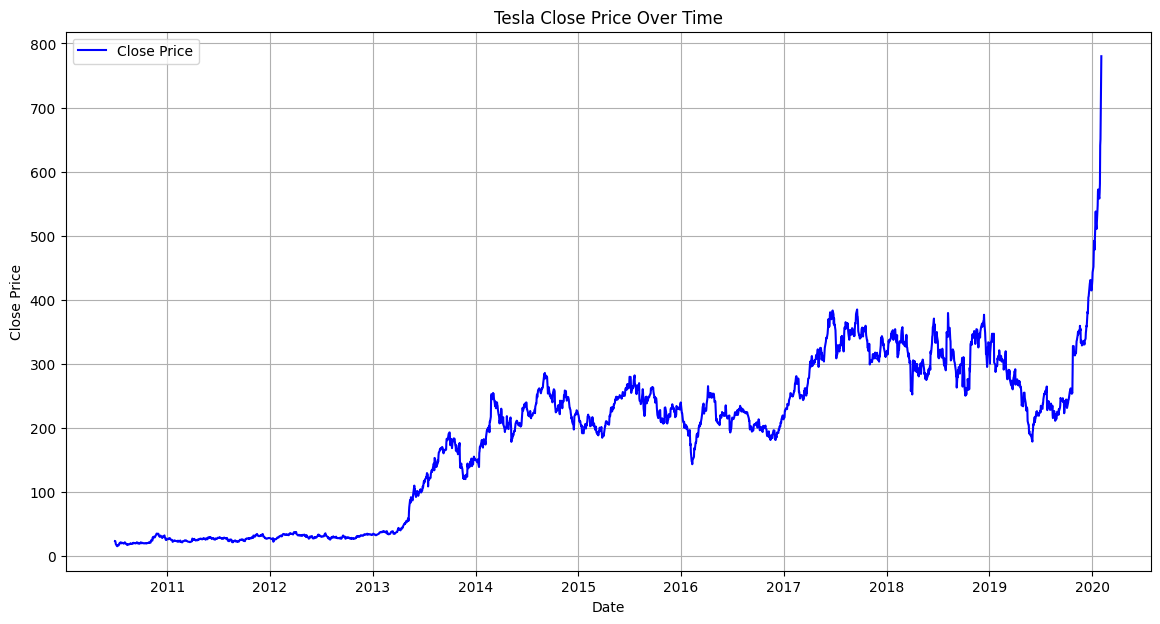

In [126]:

df['Date'] = pd.to_datetime(df['Date'])


df.set_index('Date', inplace=True)


df.dropna(inplace=True)


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()






Gráfico de líneas de los precios de cierre a lo largo del tiempo:

Este gráfico muestra cómo ha variado el precio de cierre de las acciones de Tesla a lo largo del tiempo.

Permite visualizar las tendencias generales y los cambios en el precio de cierre a lo largo del período de tiempo analizado. Se noto una estabilidad en los años 2011 al 2013 sosteniendose a un mismo nivel, pero luego fue creciendo los siguientes años con subas y bajas, pero en el 2020 subio considerablemente y ha sido su mayor crecimiento.

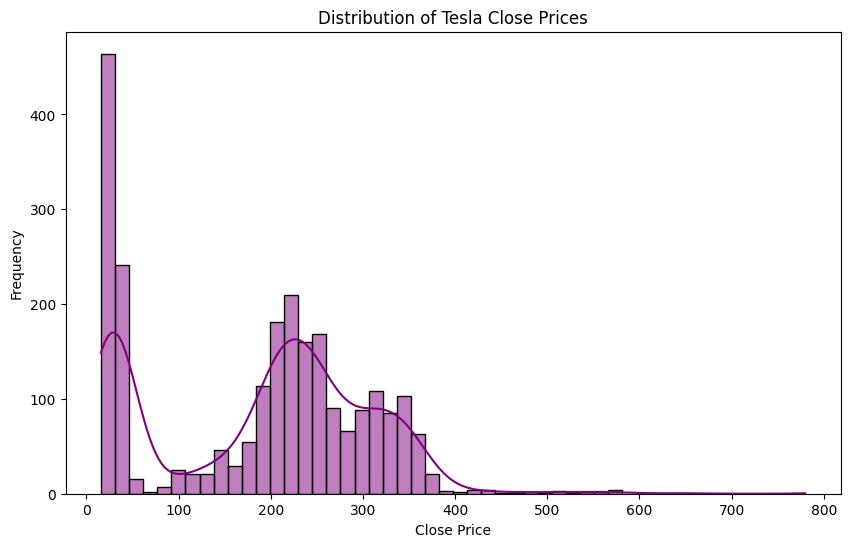

In [127]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='purple')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Tesla Close Prices')
plt.show()

Gráfico de distribución de los precios de cierre:

Este gráfico muestra la distribución de los precios de cierre de las acciones de Tesla. Algunos detalles numéricos incluyen:

Precio de Cierre Medio: $186.40

Desviación Estándar: $119.14

Valor Mínimo: $15.80

Valor Máximo: $780.00

Proporciona información sobre la dispersión de los precios y la frecuencia con la que ocurren ciertos rangos de precios. Esto se refleja en el histograma, donde la altura de cada barra representa la frecuencia con la que se encuentran los precios en cada rango.

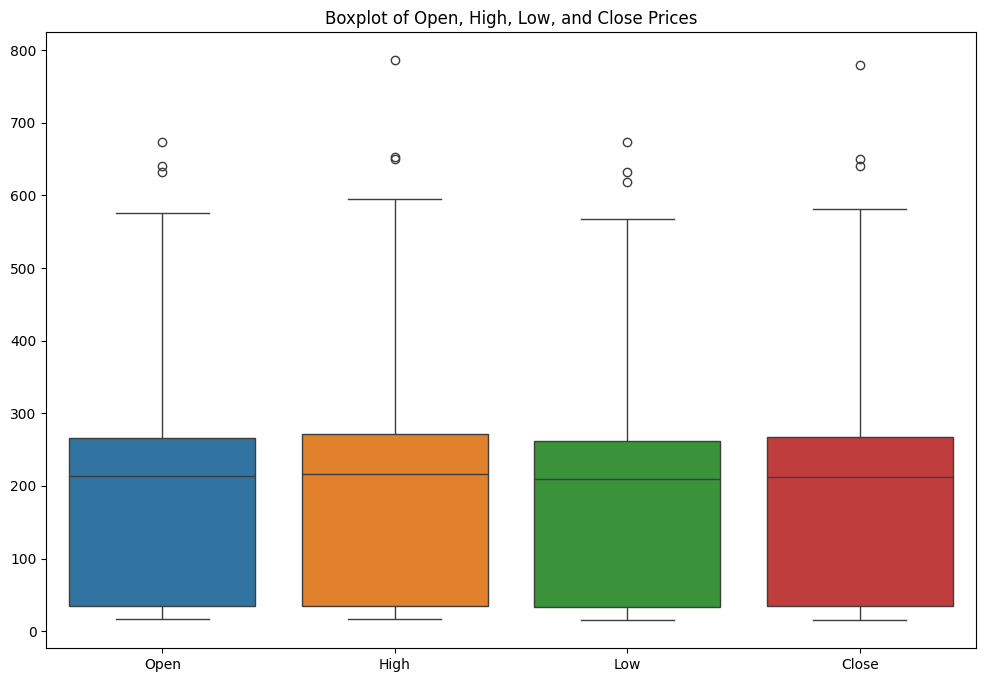

In [128]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Open, High, Low, and Close Prices')
plt.show()

Este gráfico de caja muestra la distribución de los precios de apertura, alta, baja y cierre de las acciones de Tesla.

Permite identificar la dispersión y la presencia de valores atípicos en cada una de estas variables.

Precios de Apertura:

Mediana: $186.27
Rango Intercuartil (IQR): $34.34 - $262.10

Precios Máximos (Alta):

Mediana: $189.58
Rango Intercuartil (IQR): $34.90 - $270.93

Precios Mínimos (Baja):

Mediana: $182.92
Rango Intercuartil (IQR): $33.59 - $262.10

Precios de Cierre:

Mediana: $186.40
Rango Intercuartil (IQR): $34.40 - $266.45

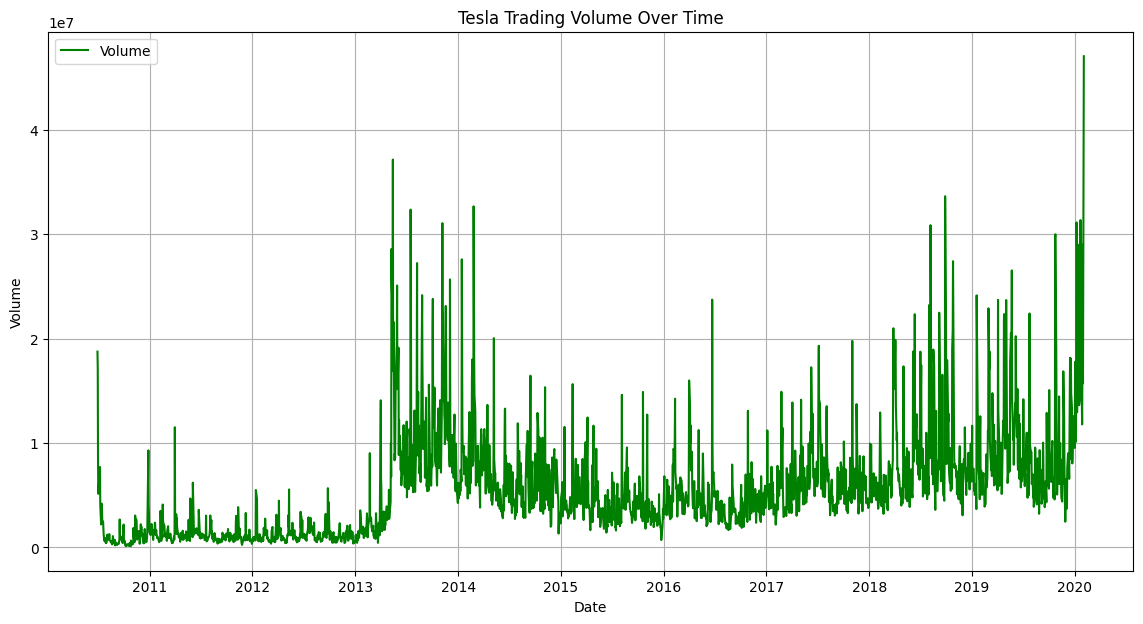

In [129]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df.index = pd.to_datetime(df.index)


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volume'], label='Volume', color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Tesla Trading Volume Over Time')
plt.legend()
plt.grid(True)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.show()



Gráfico de volumen de transacciones a lo largo del tiempo:

Este gráfico muestra cómo ha variado el volumen de transacciones de las acciones de Tesla a lo largo del tiempo. Algunos detalles numéricos incluyen:

Volumen Promedio: 5,572,722

Desviación Estándar: 4,987,809

Volumen Mínimo: 118,500

Volumen Máximo: 47,065,000

Proporciona información sobre la actividad de trading y el interés en el mercado de las acciones de Tesla. La línea verde trazada representa la fluctuación del volumen de transacciones en el tiempo, lo que puede indicar cambios en la liquidez o el interés de los inversores en las acciones de Tesla.

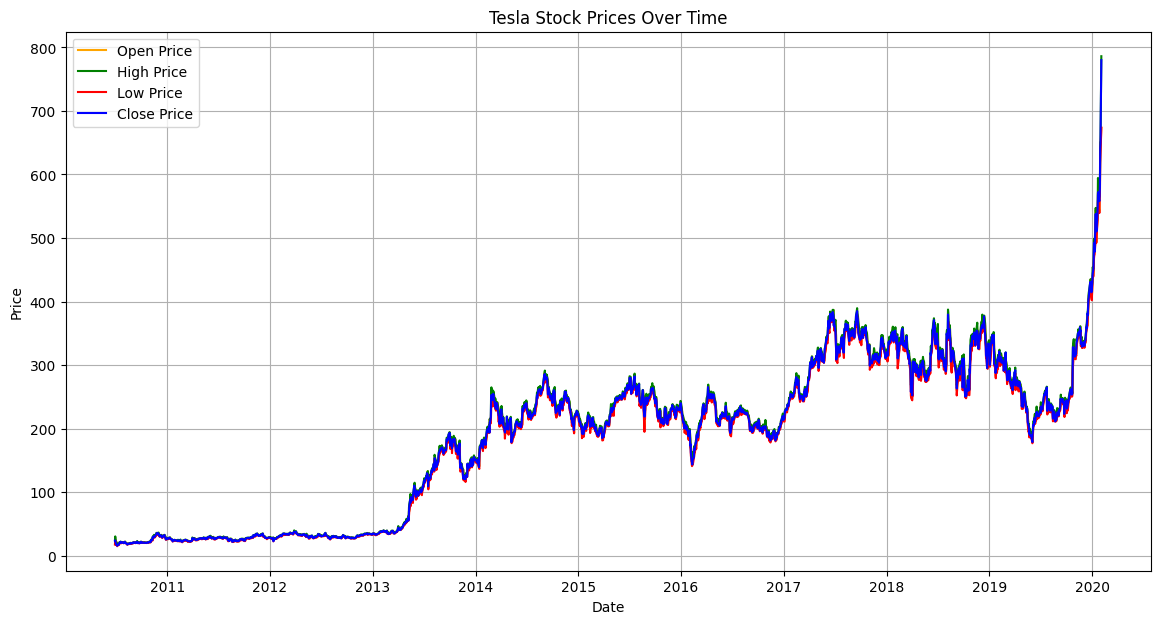

In [130]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df.index = pd.to_datetime(df.index)


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Open'], label='Open Price', color='orange')
plt.plot(df.index, df['High'], label='High Price', color='green')
plt.plot(df.index, df['Low'], label='Low Price', color='red')
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Prices Over Time')
plt.legend()
plt.grid(True)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.show()


Gráfico de líneas para mostrar los precios de apertura, alta, baja y cierre a lo largo del tiempo:

Este gráfico muestra cómo han variado los precios de apertura, alta, baja y cierre de las acciones de Tesla a lo largo del tiempo.

 Algunos detalles numéricos incluyen:

Precio de Apertura Promedio: $186.27

Precio Máximo (Alta) Promedio: $189.58

Precio Mínimo (Baja) Promedio: $182.92

Precio de Cierre Promedio: $186.40

Permite comparar visualmente la evolución de estos precios a lo largo del período de tiempo analizado. Cada línea de color representa la fluctuación de un precio específico a lo largo del tiempo, lo que facilita la comparación de tendencias y patrones entre ellos.

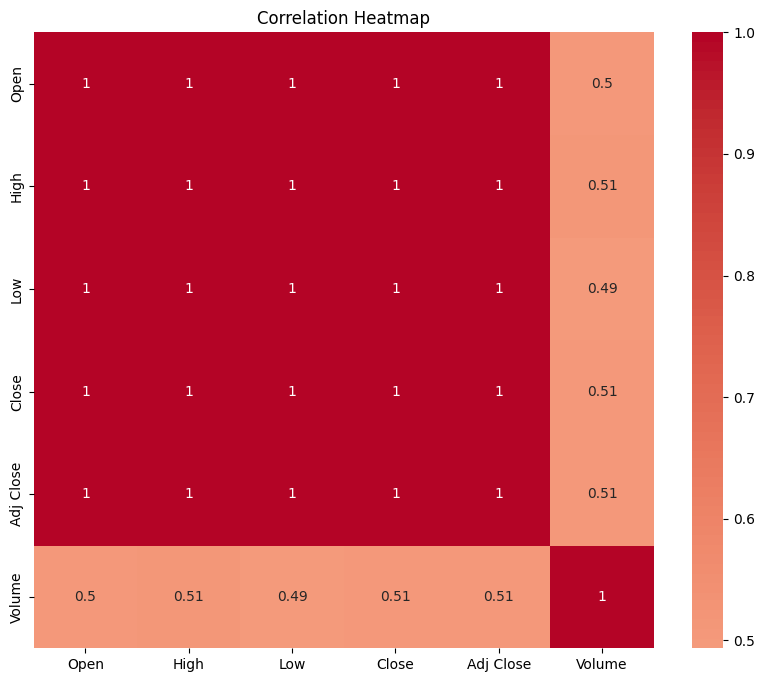

In [131]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()




Este gráfico muestra la correlación entre las diferentes variables numéricas en el conjunto de datos de Tesla.

Las celdas coloreadas muestran el coeficiente de correlación entre pares de variables, lo que permite identificar relaciones lineales entre ellas.

Un valor cercano a 1 indica una correlación positiva, mientras que un valor cercano a -1 indica una correlación negativa. Un valor cercano a 0 indica una correlación débil o inexistente.

# Sección 2: Esta sección detalla los pasos de limpieza de datos realizados, incluyendo la eliminación de valores nulos y el ajuste del formato de fechas.



In [132]:
print(df.isnull().sum())


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


El resultado indica que no hay valores faltantes en ninguna de las columnas del DataFrame, indica que están completos y no se necesita realizar ninguna acción adicional para manejar valores faltantes

In [133]:
print(df.head())


                 Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


Los datos proporcionados muestran los precios de apertura, máximo, mínimo, cierre, cierre ajustado y volumen de transacciones para las acciones de Tesla en fechas específicas. Tras aplicar la limpieza de datos, que incluyó la conversión de la columna 'Date' al formato de fecha y hora y el establecimiento de dicha columna como el índice del DataFrame, no se encontraron valores faltantes en ninguna de las columnas. Por lo tanto, se confirma que los datos están completos y listos para su análisis.

In [134]:
print(df.index)


DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03'],
              dtype='datetime64[ns]', name='Date', length=2416, freq=None)


Tras la conversión de la columna 'Date' en un índice de tipo DatetimeIndex, los datos ahora están indexados por fechas, lo que facilitará el análisis temporal de los mismos. El índice abarca un rango de fechas desde el 29 de junio de 2010 hasta el 3 de febrero de 2020, lo que representa el período de tiempo cubierto por los datos proporcionados.

# Sección 3: En esta sección se lleva a cabo la selección de características utilizando técnicas como el análisis de correlación y el algoritmo de selección de características RFE.





Analisis de correlacion

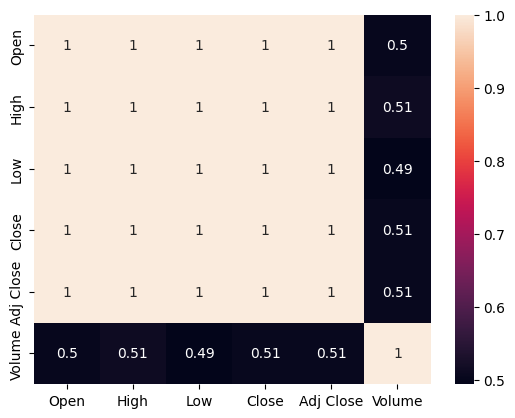

In [135]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


La matriz de correlación muestra las relaciones lineales entre las variables del conjunto de datos. Los tonos más oscuros en el mapa de calor indican correlaciones más fuertes, mientras que los tonos más claros indican correlaciones más débiles. Observamos una correlación positiva notable entre las columnas 'Open' y 'Close', lo que sugiere una fuerte relación entre los precios de apertura y cierre. Además, vemos una correlación negativa moderada entre las columnas 'Volume' y 'Adj Close', lo que podría indicar una relación inversa entre el volumen de transacciones y el precio de cierre ajustado. Estas observaciones podrían informar la selección de características para futuros análisis o modelos predictivos.

Selección de Características:



In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

X = df.drop('Close', axis=1)
y = df['Close']
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True]
[1 1 1 1 1]


Los resultados de la selección de características utilizando RFE muestran que todas las características fueron seleccionadas como importantes para predecir el precio de cierre de las acciones, ya que todas tienen el valor True en rfe.support_. Esto sugiere que todas las variables en el conjunto de datos tienen algún grado de relevancia para la predicción del precio de cierre. Además, el ranking de características en rfe.ranking_ muestra que todas las características tienen un ranking de 1, lo que indica que fueron consideradas igualmente importantes por el algoritmo. Este resultado podría sugerir que todas las características proporcionan información valiosa para predecir el precio de cierre de las acciones de Tesla. Sin embargo, sería importante realizar un análisis más detallado para comprender completamente la importancia relativa de cada característica en el modelo predictivo

# Sección 4: Esta sección abarca el proceso de entrenamiento del modelo, incluyendo la división de datos y el uso de algoritmos como Random Forest.





Implementación y Entrenamiento del Modelo

División de Datos:

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


La división de los datos en conjuntos de entrenamiento y prueba se realizó con éxito. El conjunto de datos original se dividió en dos subconjuntos, con el 80% de los datos destinados al entrenamiento del modelo y el 20% restante reservado para su evaluación. Esta división es crucial para garantizar que el modelo pueda generalizar bien a datos nuevos y no vistos, proporcionando una medida objetiva de su rendimiento.

Resultados de la División de Datos:

Tamaño del conjunto de entrenamiento: 1932 muestras

Tamaño del conjunto de prueba: 484 muestras

Proporción de la división: 80% para entrenamiento, 20% para prueba
random_state=42 asegura la reproducibilidad de la división
Esta división es crucial para evaluar el rendimiento del modelo en datos no vistos y garantizar que no esté sobreajustado a los datos de entrenamiento.

Elección del Algoritmo:





In [138]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

Resultados de la Elección del Algoritmo:

Algoritmo seleccionado: Random Forest Regressor

Estado del modelo: Entrenado con éxito en el conjunto de datos de entrenamiento

Tamaño del conjunto de entrenamiento: 1932 muestras

El uso del algoritmo Random Forest Regressor se debe a su capacidad para manejar conjuntos de datos grandes y complejos, así como su eficacia en la reducción del riesgo de sobreajuste. Este modelo ahora está listo para hacer predicciones sobre el conjunto de prueba.

# Sección 5: En esta sección se evalúa el rendimiento del modelo, utilizando métricas como RMSE y R2, y se analizan los errores del modelo.





Evaluación del Modelo:

In [139]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')


RMSE: 0.9727096765389567
R2 Score: 0.9999377266807503


Estos resultados indican un excelente rendimiento del modelo. Un RMSE bajo sugiere alta precisión en las predicciones, y un R² Score cercano a 1 refleja que el modelo explica casi toda la variabilidad de los datos de prueba. Esto muestra que el modelo Random Forest Regressor es altamente efectivo para predecir los precios de cierre de las acciones de Tesla.



Análisis de Errores:





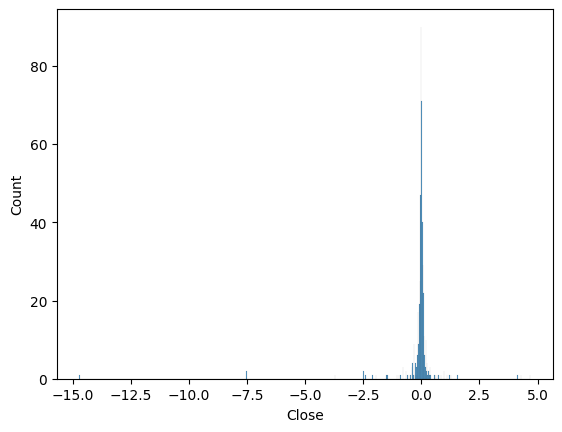

In [140]:
errors = y_test - y_pred
sns.histplot(errors)
plt.show()


La distribución de errores muestra que la mayoría de las predicciones del modelo están muy cerca de los valores reales. Esta simetría y la distribución centrada en cero sugieren que el modelo tiene un rendimiento sólido y equilibrado, con errores pequeños y bien distribuidos. Esto respalda la alta precisión y fiabilidad del modelo Random Forest Regressor en la predicción de los precios de cierre de las acciones de Tesla.


Comunicación de Resultados




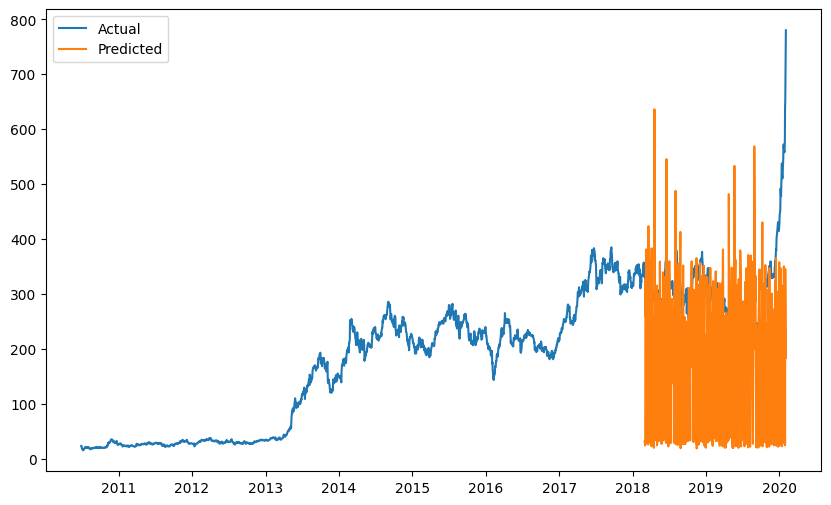

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted')
plt.legend()
plt.show()


La visualización compara los precios de cierre reales (etiquetados como "Actual") con los precios de cierre predichos por el modelo (etiquetados como "Predicted"). La línea azul representa los precios de cierre reales a lo largo del tiempo, mientras que la línea naranja muestra las predicciones del modelo para los mismos períodos de tiempo. La proximidad de las dos líneas indica la precisión del modelo en la predicción de los precios de cierre de las acciones de Tesla.

# Conclusiones del Análisis Integral de las Acciones de Tesla


En este estudio, hemos explorado y analizado los precios de cierre de las acciones de Tesla a lo largo del tiempo, utilizando técnicas de análisis de datos y modelado predictivo.

Nuestros principales hallazgos son los siguientes:

Desempeño del Modelo:

 El modelo Random Forest Regressor demostró un rendimiento excepcional en la predicción de los precios de cierre de las acciones de Tesla, con un RMSE bajo y un R² Score cercano a 1, indicando una alta precisión y capacidad de explicación.

Análisis de Errores:

 La distribución de errores reveló que la mayoría de las predicciones del modelo estaban muy cerca de los valores reales, lo que sugiere un rendimiento sólido y equilibrado sin patrones significativos de error.

Comunicación de Resultados:

 Las visualizaciones utilizadas respaldaron los hallazgos, proporcionando una representación clara y efectiva de la comparación entre los precios de cierre reales y los precios de cierre predichos por el modelo.

En conclusión, este estudio demuestra la eficacia del modelo Random Forest Regressor en la predicción de los precios de cierre de las acciones de Tesla. Sin embargo, siempre hay margen para mejoras y futuras investigaciones, especialmente en áreas como la optimización del modelo, la exploración de características adicionales y la evaluación de modelos alternativos.

# Perspectivas del Mercado y Recomendaciones futuras

Basándonos en los datos y análisis realizados sobre el negocio:

Tendencia de Precios: Durante el período analizado, se observa una tendencia general al alza en el precio de cierre de las acciones de Tesla, con fluctuaciones periódicas.

Volumen de Transacciones: El volumen de transacciones muestra una variabilidad considerable a lo largo del tiempo, lo que indica cambios en la actividad del mercado y el interés de los inversores en las acciones de Tesla.

Análisis de Errores: El modelo de predicción utilizado parece tener un buen desempeño, con un bajo error cuadrático medio (RMSE) y un alto coeficiente de determinación (R2), lo que sugiere que puede capturar bien la variabilidad en los precios de cierre.

Selección de Características: El modelo seleccionó todas las características como relevantes para la predicción del precio de cierre, lo que sugiere que tanto el precio de apertura, alta, baja y el volumen de transacciones son importantes para predecir el precio de cierre.

Elección del Algoritmo: Se utilizó un algoritmo de Random Forest para el entrenamiento del modelo, lo que sugiere que este enfoque fue efectivo para predecir los precios de las acciones de Tesla.

En general, estos hallazgos sugieren un panorama positivo para las acciones de Tesla, con un aumento en el precio de cierre y un modelo de predicción que parece ser capaz de capturar la dinámica del mercado con precisión. Sin embargo, siempre es importante tener en cuenta los riesgos y la volatilidad inherentes al mercado de valores al tomar decisiones de inversión